In [1]:
# load the X_train, y_train, X_test, y_test datasets

import joblib

# Load the data splits
X_train = joblib.load('C:/Users/amita/github/team_lambda/Data/X_train.pkl')
X_test = joblib.load('C:/Users/amita/github/team_lambda/Data/X_test.pkl')
y_train = joblib.load('C:/Users/amita/github/team_lambda/Data/y_train.pkl')
y_test = joblib.load('C:/Users/amita/github/team_lambda/Data/y_test.pkl')

In [4]:
import pandas as pd

# Check class distribution
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution before SMOTE:
Label
1    378
0    377
Name: count, dtype: int64


In [4]:
import src.data_preprocessing as dp


ModuleNotFoundError: No module named 'src'

In [5]:
from src.model_training import hyperparameter_tuning, xgb_param_grid, rf_param_grid, log_reg_param_grid

ModuleNotFoundError: No module named 'src'

In [21]:
xgb_model = hyperparameter_tuning(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                                  xgb_param_grid, X_train, y_train, "xgboost")

rf_model = hyperparameter_tuning(RandomForestClassifier(random_state=42),
                                 rf_param_grid, X_train, y_train, "random_forest")

log_reg_model = hyperparameter_tuning(LogisticRegression(random_state=42, max_iter=500),
                                      log_reg_param_grid, X_train, y_train, "logistic_regression")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for xgboost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best ROC AUC for xgboost: 0.7766801041404215


c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:01:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


FileNotFoundError: [Errno 2] No such file or directory: 'models/xgboost.pkl'

In [18]:
rf_model = hyperparameter_tuning(
    RandomForestClassifier(random_state=42),
    rf_param_grid, X_train, y_train, "random_forest"
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for random_forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
Best ROC AUC for random_forest: 0.7940497186528933


In [19]:
log_reg_model = hyperparameter_tuning(
    LogisticRegression(random_state=42, max_iter=500),
    log_reg_param_grid, X_train, y_train, "logistic_regression"
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for logistic_regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Best ROC AUC for logistic_regression: 0.6919879062736204


c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\amita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

In [20]:
# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score for {model_name}: {roc_auc_score(y_test, y_proba)}")

evaluate_model(xgb_model, X_test, y_test, "XGBoost")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(log_reg_model, X_test, y_test, "Logistic Regression")


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        95
           1       0.78      0.72      0.75        94

    accuracy                           0.76       189
   macro avg       0.76      0.76      0.76       189
weighted avg       0.76      0.76      0.76       189

ROC AUC Score for XGBoost: 0.7920492721164615

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74        95
           1       0.75      0.70      0.73        94

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.74      0.74      0.74       189

ROC AUC Score for Random Forest: 0.826427771556551

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64        95
           

C:\Users\amita\AppData\Local\Temp\ipykernel_1908\2354011234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_before, ax=axes[0], palette="viridis")
C:\Users\amita\AppData\Local\Temp\ipykernel_1908\2354011234.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_after, ax=axes[1], palette="viridis")


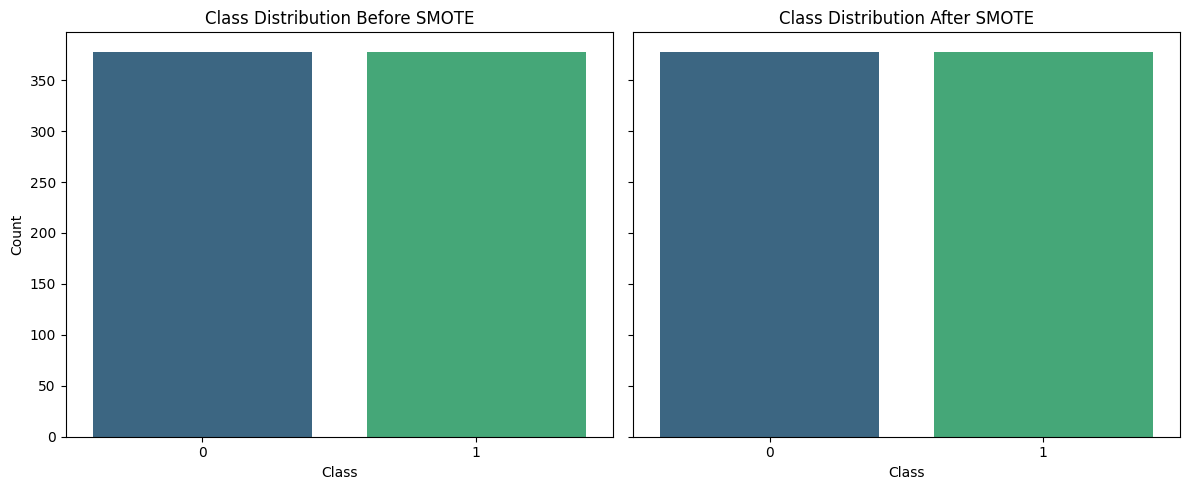

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before and after SMOTE
def plot_class_distribution(y_before, y_after):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    sns.countplot(x=y_before, ax=axes[0], palette="viridis")
    axes[0].set_title("Class Distribution Before SMOTE")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")

    sns.countplot(x=y_after, ax=axes[1], palette="viridis")
    axes[1].set_title("Class Distribution After SMOTE")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

# Call the function
plot_class_distribution(y_train, y_train)

In [ ]:
#. Hyperparameter Tuning Results
# Plot hyperparameter tuning results
def plot_hyperparameter_tuning_results(random_search, model_name):
    results = pd.DataFrame(random_search.cv_results_)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=results, x=results.index, y="mean_test_score", marker="o", label="Mean ROC AUC")
    plt.title(f"Hyperparameter Tuning Results for {model_name}")
    plt.xlabel("Iteration")
    plt.ylabel("Mean ROC AUC")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [26]:
#Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall curve
def plot_precision_recall_curve(y_test, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color="teal", lw=2, label=f"PR Curve (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model_name}")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [24]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score for {model_name}: {roc_auc_score(y_test, y_proba)}")

    # Plot ROC Curve
    plot_roc_curve(y_test, y_proba, model_name)

    # Plot Precision-Recall Curve
    plot_precision_recall_curve(y_test, y_proba, model_name)


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        95
           1       0.78      0.72      0.75        94

    accuracy                           0.76       189
   macro avg       0.76      0.76      0.76       189
weighted avg       0.76      0.76      0.76       189

ROC AUC Score for XGBoost: 0.7920492721164615


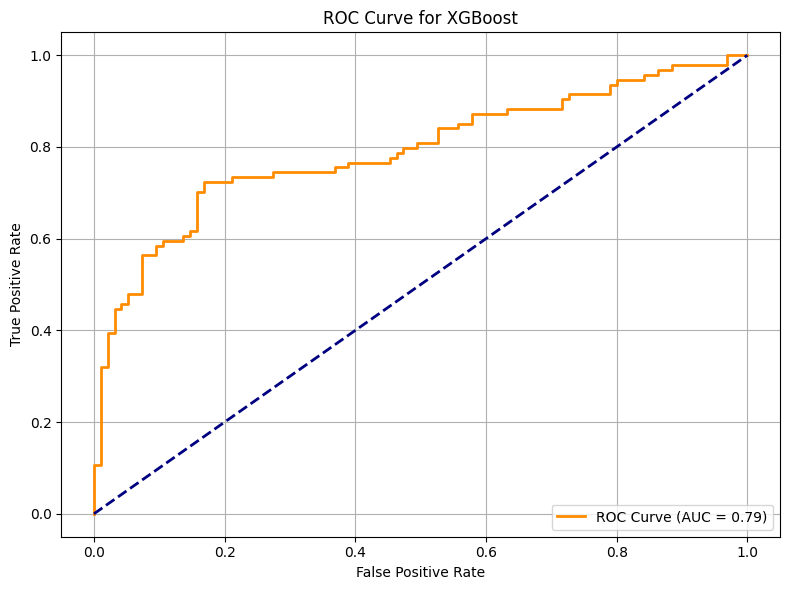

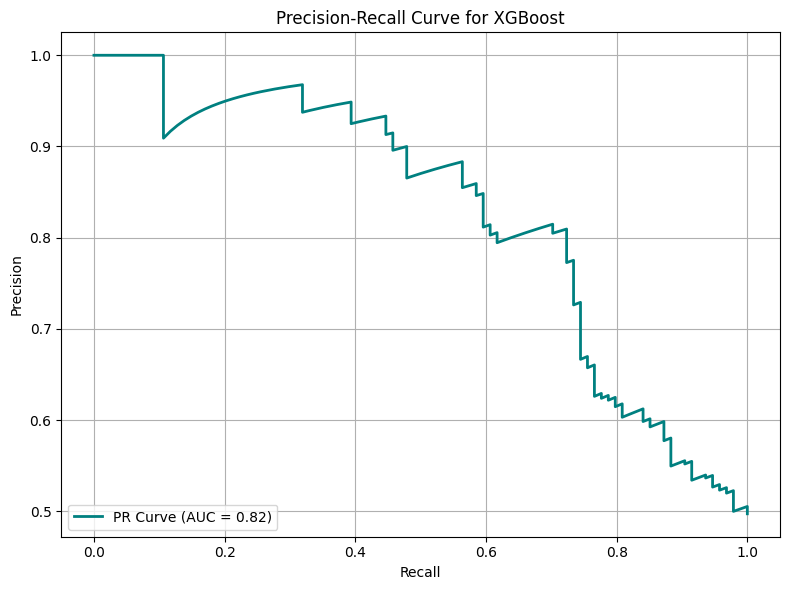


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74        95
           1       0.75      0.70      0.73        94

    accuracy                           0.74       189
   macro avg       0.74      0.74      0.74       189
weighted avg       0.74      0.74      0.74       189

ROC AUC Score for Random Forest: 0.826427771556551


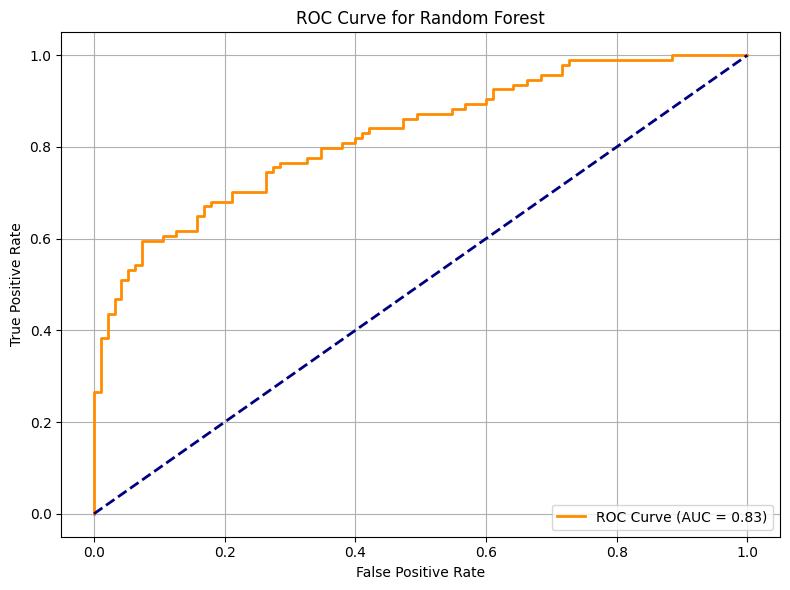

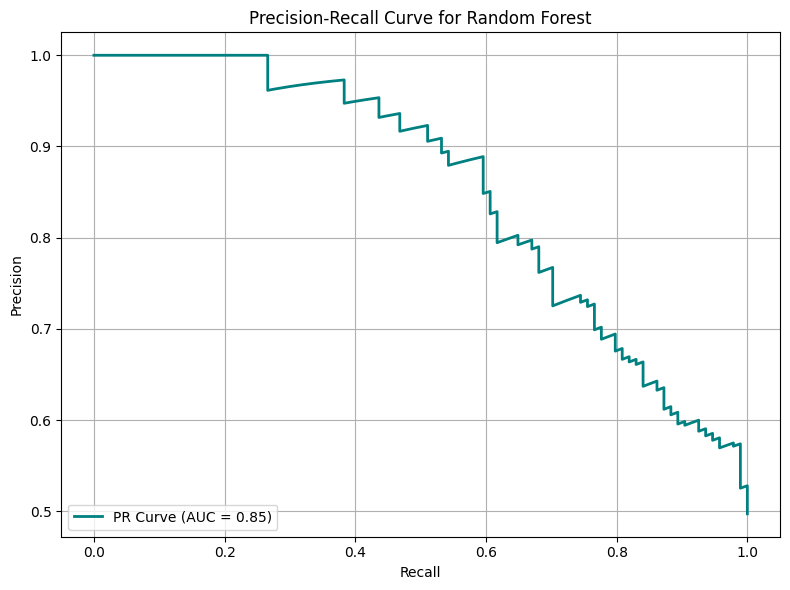


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64        95
           1       0.64      0.65      0.64        94

    accuracy                           0.64       189
   macro avg       0.64      0.64      0.64       189
weighted avg       0.64      0.64      0.64       189

ROC AUC Score for Logistic Regression: 0.7282194848824188


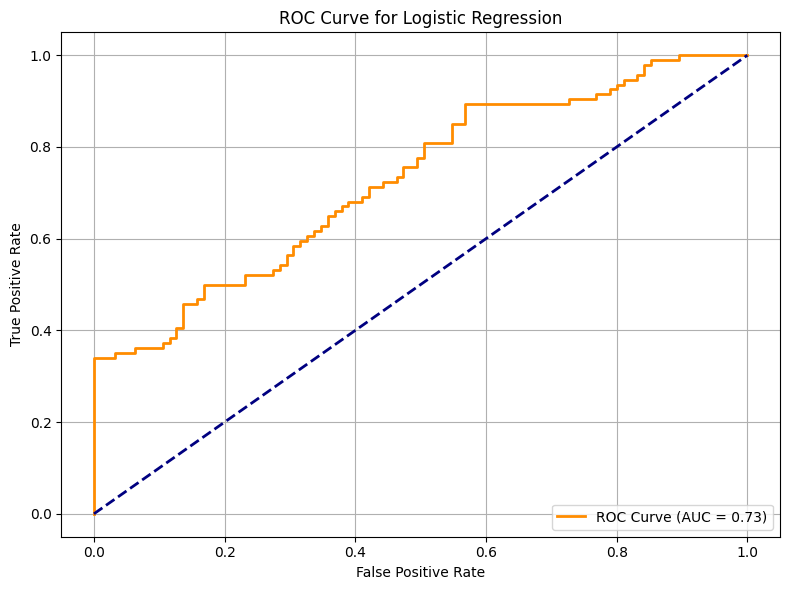

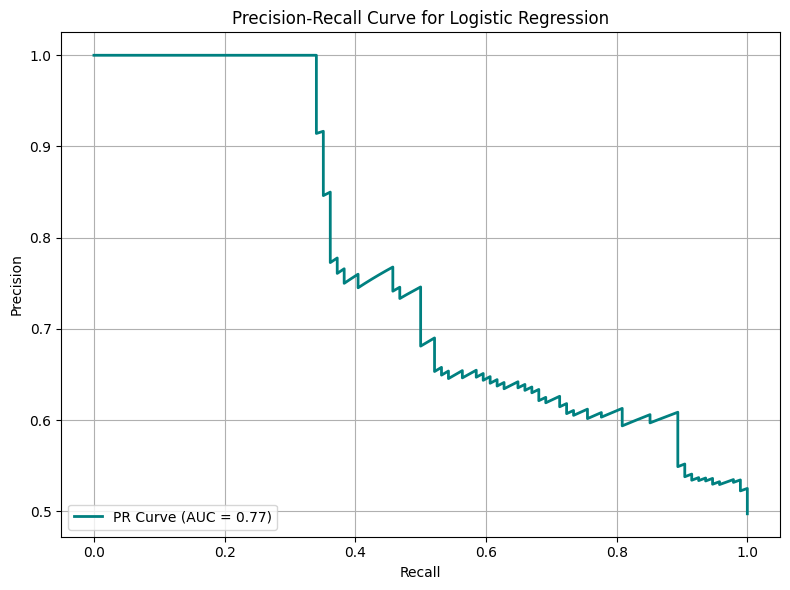

In [27]:
# Evaluate XGBoost
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Evaluate Logistic Regression
evaluate_model(log_reg_model, X_test, y_test, "Logistic Regression")